<a href="https://colab.research.google.com/github/madhurapi/Car-Policy-Claim-Prediction-AV-Hackathon-/blob/main/Policy_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import 'Numpy' 
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 


In [ ]:
file = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/analytics vidhya hackhathon/train_qWM28Yl.csv")
file1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/analytics vidhya hackhathon/test_zo1G9sv.csv")

In [ ]:
df = pd.DataFrame(file)
df_test = pd.DataFrame(file1)

In [ ]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.050000,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.020000,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.020000,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.110000,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.110000,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
df_test

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.000000,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.130000,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.120000,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.010000,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.020000,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,ID97651,0.047982,0.150000,0.740385,C2,27003,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
39059,ID97652,1.224838,0.050000,0.509615,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
39060,ID97653,0.520287,0.120000,0.355769,C6,13051,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
39061,ID97654,1.172391,0.080000,0.644231,C5,34738,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2


In [ ]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [ ]:
df_test.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [ ]:
df.duplicated().sum()

0

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

In [ ]:
df.is_claim.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

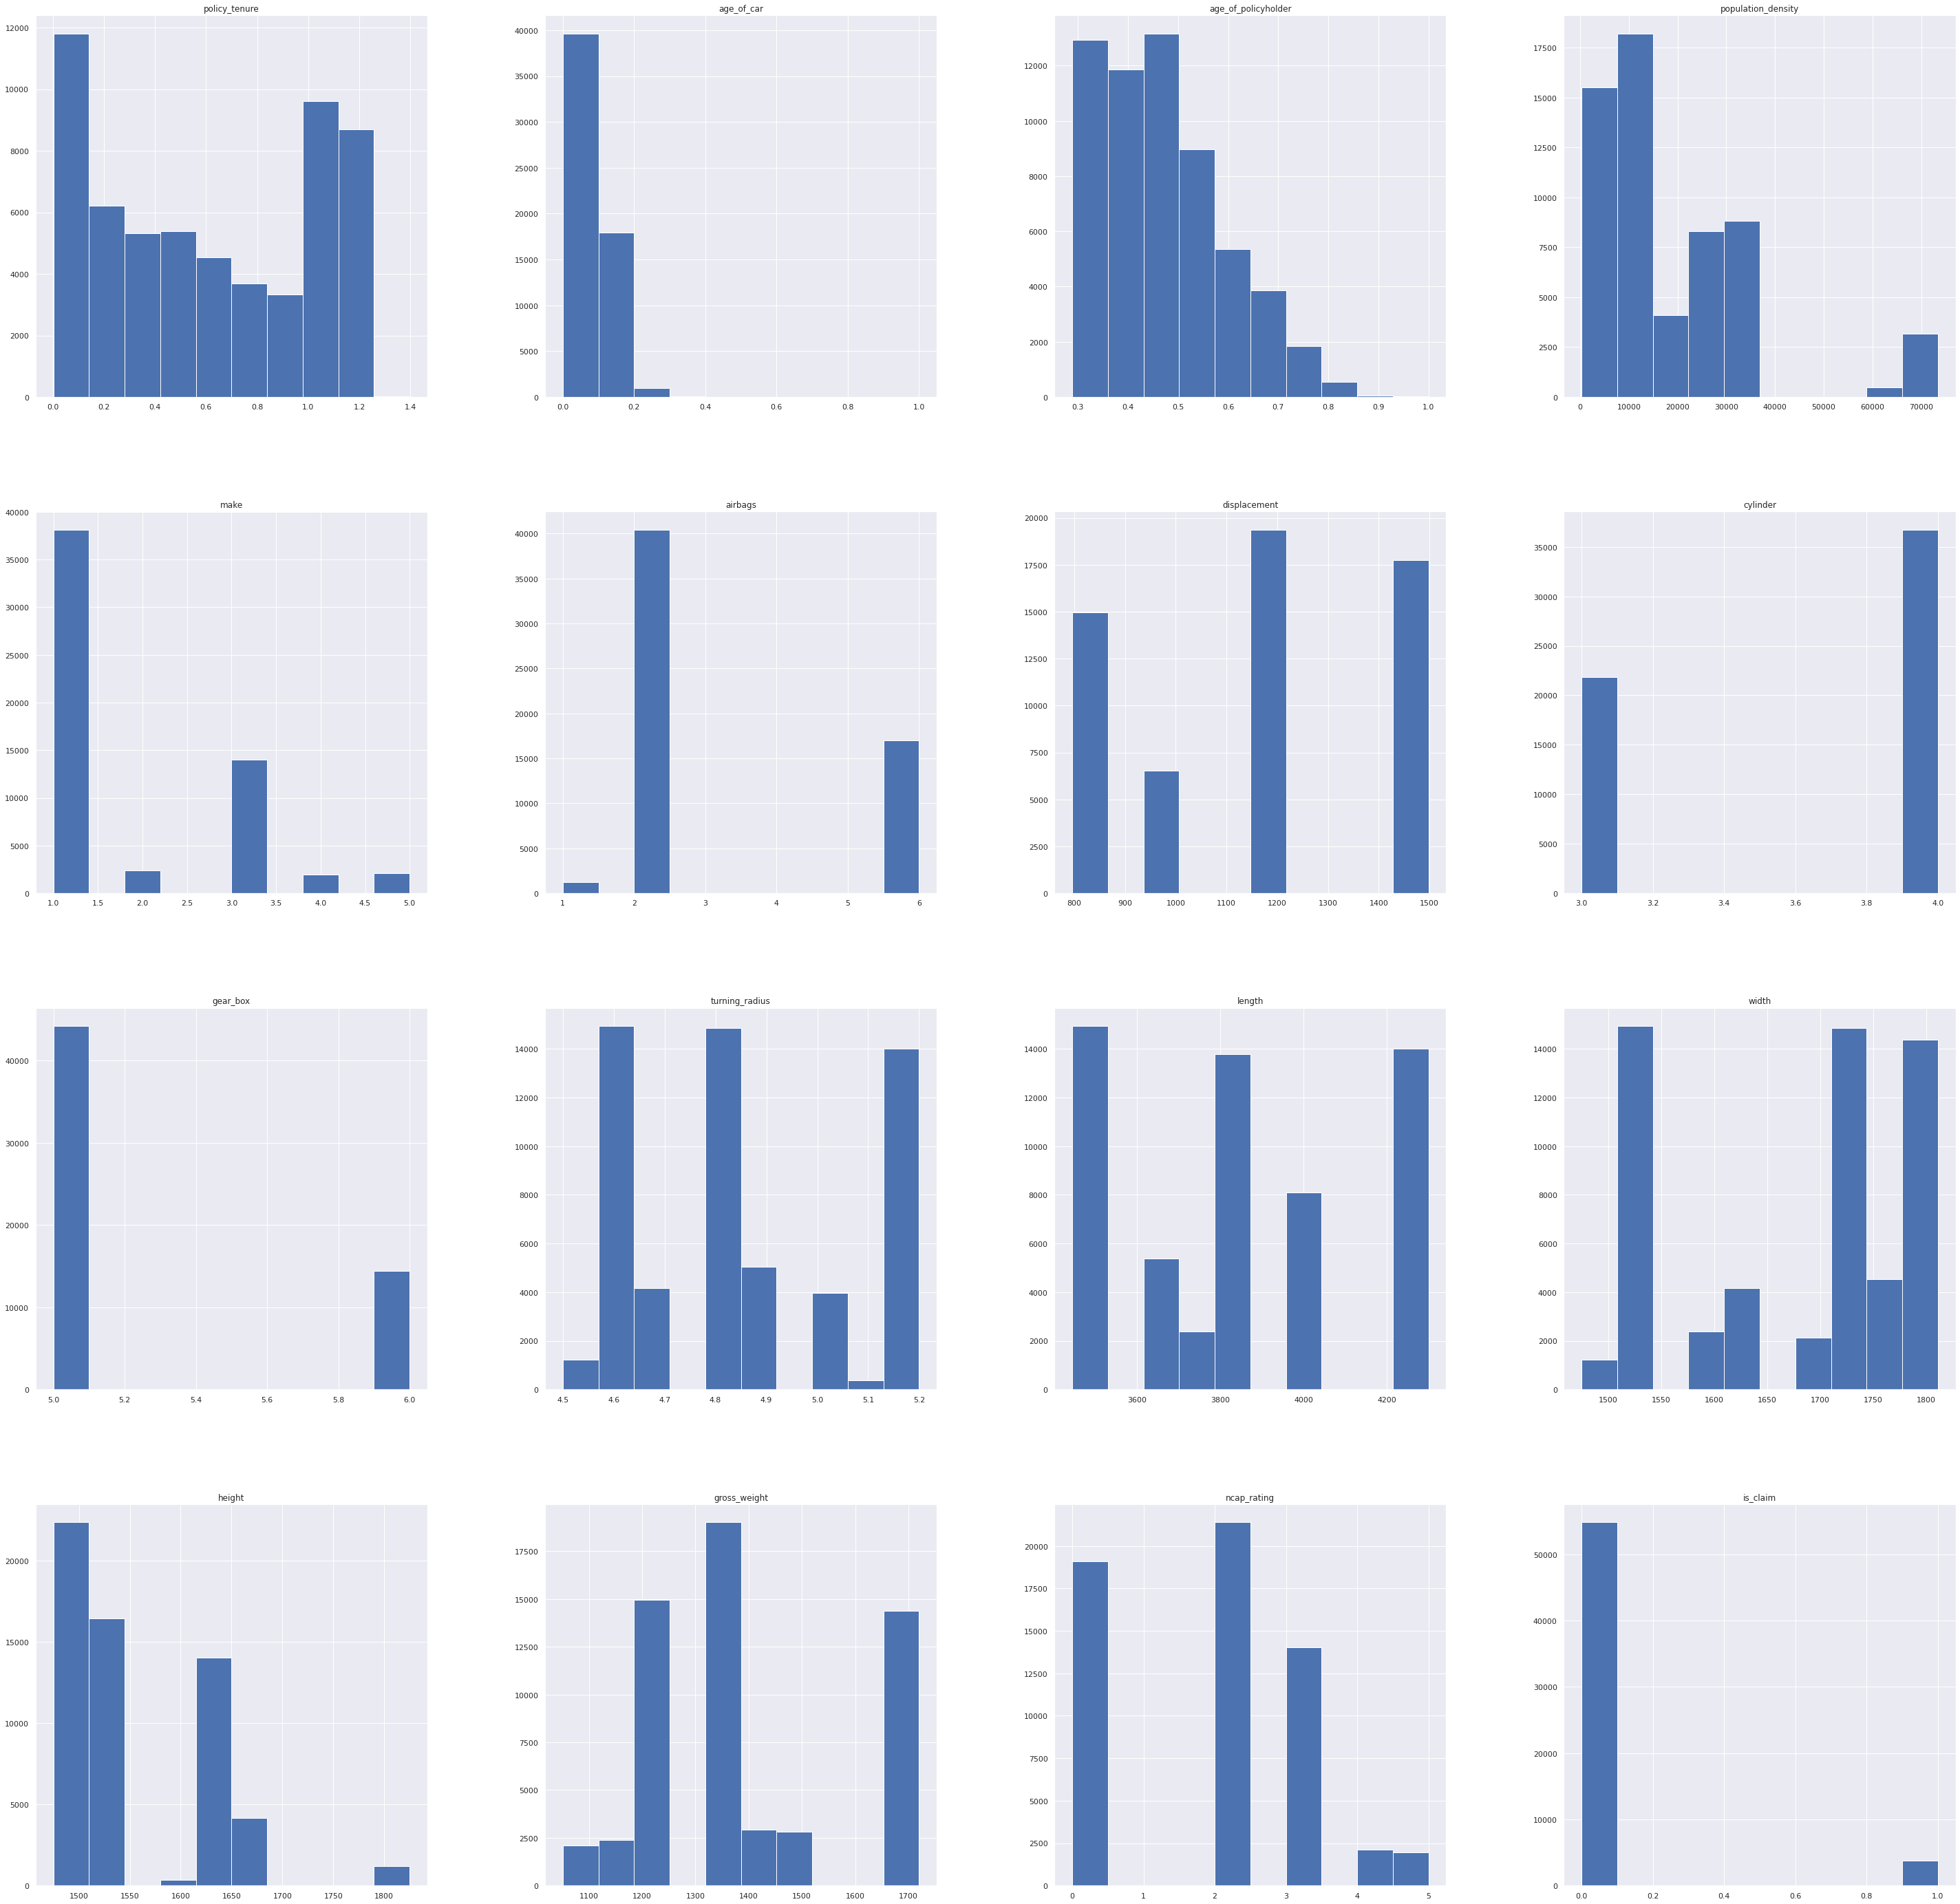

In [ ]:
# set the plot size
plt.rcParams['figure.figsize']=(50,50)
#numeric column datatype
df_numeric = df.select_dtypes(include=np.number)
df_numeric.hist()
# show plot
plt.show()

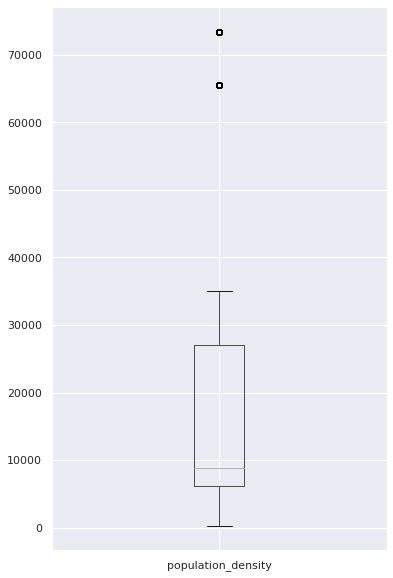

In [ ]:
sns.set(rc={"figure.figsize":(6, 10)})
df.boxplot('population_density')

In [ ]:
df_numeric_test = df.select_dtypes(include=np.number)

In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_tenure        58592 non-null  float64
 1   age_of_car           58592 non-null  float64
 2   age_of_policyholder  58592 non-null  float64
 3   population_density   58592 non-null  int64  
 4   make                 58592 non-null  int64  
 5   airbags              58592 non-null  int64  
 6   displacement         58592 non-null  int64  
 7   cylinder             58592 non-null  int64  
 8   gear_box             58592 non-null  int64  
 9   turning_radius       58592 non-null  float64
 10  length               58592 non-null  int64  
 11  width                58592 non-null  int64  
 12  height               58592 non-null  int64  
 13  gross_weight         58592 non-null  int64  
 14  ncap_rating          58592 non-null  int64  
 15  is_claim             58592 non-null 

In [ ]:
num_col = df[['policy_tenure','age_of_car','age_of_policyholder','population_density','is_claim']]

In [ ]:
num_col.corr()

,policy_tenure,age_of_car,age_of_policyholder,population_density,is_claim
policy_tenure,1.000000,0.166312,0.143676,-0.100307,0.078747
age_of_car,0.166312,1.000000,-0.035427,-0.062255,-0.028172
age_of_policyholder,0.143676,-0.035427,1.000000,0.009669,0.022435
population_density,-0.100307,-0.062255,0.009669,1.000000,-0.017808
is_claim,0.078747,-0.028172,0.022435,-0.017808,1.000000


These are the columns that are boolean in nature so we will replace the value of ‘Yes’ with 1 and ‘No’ with 0.

['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks','is_central_locking','is_power_steering',
'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror','is_ecw', 'is_speed_alert']

For the mentioned columns we will do one-hot encoding as these are independent values inside it.
['area_cluster', 'segment', 'model', 'fuel_type', 'rear_brakes_type', 'engine_type']

Ordinal columns
These are columns we replace the value in terms of there priority value
Columns : ['transmission_type', 'steering_type']
Ex:      {'Manual': 1, 'Automatic': 2}
{'Manual': 1, 'Power': 2, 'Electric': 3}

Compound Features
	['max_torque', 'max_power']: These features are split into 4 numerical features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
# set the plot size
# plt.rcParams['figure.figsize']=(50,50)
#numeric column datatype
df_category = df.select_dtypes(include=object)
# df_numeric.hist()
# show plot
# plt.show()

In [ ]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   policy_id                         58592 non-null  object
 1   area_cluster                      58592 non-null  object
 2   segment                           58592 non-null  object
 3   model                             58592 non-null  object
 4   fuel_type                         58592 non-null  object
 5   max_torque                        58592 non-null  object
 6   max_power                         58592 non-null  object
 7   engine_type                       58592 non-null  object
 8   is_esc                            58592 non-null  object
 9   is_adjustable_steering            58592 non-null  object
 10  is_tpms                           58592 non-null  object
 11  is_parking_sensors                58592 non-null  object
 12  is_parking_camera 

In [ ]:
df_category_test= df.select_dtypes(include=object)

In [ ]:
df_category.head()

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,ID00001,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,ID00002,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,ID00003,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,ID00004,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,ID00005,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes


In [ ]:
df_category.columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [ ]:
df_numeric.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [ ]:
df1 = df.copy(deep = True)

In [ ]:
df_test1 = df_test.copy(deep = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1[['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
               'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger',
               'is_brake_assist', 'is_power_door_locks','is_central_locking','is_power_steering',
                'is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw', 'is_speed_alert']] = df1[['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
               'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger',
               'is_brake_assist', 'is_power_door_locks','is_central_locking','is_power_steering',
                'is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw', 'is_speed_alert']].apply(LabelEncoder().fit_transform)

In [ ]:
df_test1[['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
               'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger',
               'is_brake_assist', 'is_power_door_locks','is_central_locking','is_power_steering',
                'is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw', 'is_speed_alert']] = df_test1[['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
               'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger',
               'is_brake_assist', 'is_power_door_locks','is_central_locking','is_power_steering',
                'is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw', 'is_speed_alert']].apply(LabelEncoder().fit_transform)

In [ ]:
# one hot encoding on following columns
# ['area_cluster', 'segment', 'model', 'fuel_type', 'rear_brakes_type', 'engine_type']
# these are categorical variable with more than two labels where order doesnt matter.

In [ ]:
one_hot_encoding_col = ['area_cluster', 'segment', 'model', 'fuel_type', 'rear_brakes_type', 'engine_type']

In [ ]:
df1 = pd.concat([df1,pd.get_dummies(df1[one_hot_encoding_col])],axis=1)
df1.drop(one_hot_encoding_col, axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 93 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_id                              58592 non-null  object 
 1   policy_tenure                          58592 non-null  float64
 2   age_of_car                             58592 non-null  float64
 3   age_of_policyholder                    58592 non-null  float64
 4   population_density                     58592 non-null  int64  
 5   make                                   58592 non-null  int64  
 6   max_torque                             58592 non-null  object 
 7   max_power                              58592 non-null  object 
 8   airbags                                58592 non-null  int64  
 9   is_esc                                 58592 non-null  int64  
 10  is_adjustable_steering                 58592 non-null  int64  
 11  is

In [ ]:
df_test1 = pd.concat([df_test1,pd.get_dummies(df_test1[one_hot_encoding_col])],axis=1)
df_test1.drop(one_hot_encoding_col, axis=1, inplace=True)
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 92 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_id                              39063 non-null  object 
 1   policy_tenure                          39063 non-null  float64
 2   age_of_car                             39063 non-null  float64
 3   age_of_policyholder                    39063 non-null  float64
 4   population_density                     39063 non-null  int64  
 5   make                                   39063 non-null  int64  
 6   max_torque                             39063 non-null  object 
 7   max_power                              39063 non-null  object 
 8   airbags                                39063 non-null  int64  
 9   is_esc                                 39063 non-null  int64  
 10  is_adjustable_steering                 39063 non-null  int64  
 11  is

In [ ]:
# ordinal_col = ['max_torque', 'max_power', 'transmission_type', 'steering_type']

In [ ]:
df1['transmission_type'] = df1['transmission_type'].replace({'Manual' : 1, 'Automatic' : 2})
df1['steering_type'] = df1['steering_type'].replace({'Manual' : 1, 'Power' : 2, 'Electric': 3})

In [ ]:
df_test1['transmission_type'] = df_test1['transmission_type'].replace({'Manual' : 1, 'Automatic' : 2})
df_test1['steering_type'] = df_test1['steering_type'].replace({'Manual' : 1, 'Power' : 2, 'Electric': 3})

In [ ]:
df1.max_torque.value_counts()

113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64

In [ ]:
df1.max_power.value_counts()

88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: max_power, dtype: int64

In [ ]:
df1[['max_torque_Nm', 'max_torque_rpm']] = df1["max_torque"].apply(lambda x: pd.Series(str(x).split("@")))

In [ ]:
df1.drop(["max_torque"], axis=1, inplace= True)

In [ ]:
df1['max_torque_rpm'] = df1['max_torque_rpm'].str[:-3].astype(int)
df1['max_torque_Nm'] = df1['max_torque_Nm'].str[:-2].astype(float)

In [ ]:
df1[['max_power_bhp', 'max_power_rpm']] = df1["max_power"].apply(lambda x: pd.Series(str(x).split("@")))
df1.drop(["max_power"], axis=1, inplace= True)
df1['max_power_rpm'] = df1['max_power_rpm'].str[:-3].astype(int)
df1['max_power_bhp'] = df1['max_power_bhp'].str[:-3].astype(float)

In [ ]:

df_test1[['max_torque_Nm', 'max_torque_rpm']] = df_test1["max_torque"].apply(lambda x: pd.Series(str(x).split("@")))
df_test1.drop(["max_torque"], axis=1, inplace= True)
df_test1['max_torque_rpm'] = df_test1['max_torque_rpm'].str[:-3].astype(int)
df_test1['max_torque_Nm'] = df_test1['max_torque_Nm'].str[:-2].astype(float)

df_test1[['max_power_bhp', 'max_power_rpm']] = df_test1["max_power"].apply(lambda x: pd.Series(str(x).split("@")))
df_test1.drop(["max_power"], axis=1, inplace= True)
df_test1['max_power_rpm'] = df_test1['max_power_rpm'].str[:-3].astype(int)
df_test1['max_power_bhp'] = df_test1['max_power_bhp'].str[:-3].astype(float)

In [ ]:
df_test1.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'transmission_type',
       'gear_box', 'steering_type', 'turning_radius', 'length', 'width',
       'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'area_cluster_C1',
       'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12',
       'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15',
       'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18',
       'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20',
       'a

In [ ]:
to_be_scaled= df1[['displacement','turning_radius','gross_weight','length','width','height','policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(to_be_scaled)
df1_scaled= pd.DataFrame(scaled_data, columns= to_be_scaled.columns)

In [ ]:
df1.drop(to_be_scaled, axis=1, inplace=True)

In [ ]:
df1 = pd.concat([df1_scaled,df1],axis=1)

In [ ]:
to_be_scaled1 = df_test1[['displacement','turning_radius','gross_weight','length','width','height','policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density']]
scaler = StandardScaler()
scaled_data_test = scaler.fit_transform(to_be_scaled1)
df_test1_scaled= pd.DataFrame(scaled_data_test, columns= to_be_scaled1.columns)

In [ ]:
df_test1.drop(to_be_scaled1, axis=1, inplace=True)




In [ ]:
df_test1 = pd.concat([df_test1_scaled,df_test1],axis=1)

In [ ]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 94 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   displacement                           39063 non-null  float64
 1   turning_radius                         39063 non-null  float64
 2   gross_weight                           39063 non-null  float64
 3   length                                 39063 non-null  float64
 4   width                                  39063 non-null  float64
 5   height                                 39063 non-null  float64
 6   policy_tenure                          39063 non-null  float64
 7   age_of_car                             39063 non-null  float64
 8   age_of_policyholder                    39063 non-null  float64
 9   population_density                     39063 non-null  float64
 10  policy_id                              39063 non-null  object 
 11  ma

In [ ]:
df2 = df1.copy(deep = True)
df_test2 = df_test1.copy(deep = True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 95 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   displacement                           58592 non-null  float64
 1   turning_radius                         58592 non-null  float64
 2   gross_weight                           58592 non-null  float64
 3   length                                 58592 non-null  float64
 4   width                                  58592 non-null  float64
 5   height                                 58592 non-null  float64
 6   policy_tenure                          58592 non-null  float64
 7   age_of_car                             58592 non-null  float64
 8   age_of_policyholder                    58592 non-null  float64
 9   population_density                     58592 non-null  float64
 10  policy_id                              58592 non-null  object 
 11  ma

In [ ]:
X = df2.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
                36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,
                71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94]]
y =df2.iloc[:,35]
print(X.info())
print(y)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 93 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   displacement                           58592 non-null  float64
 1   turning_radius                         58592 non-null  float64
 2   gross_weight                           58592 non-null  float64
 3   length                                 58592 non-null  float64
 4   width                                  58592 non-null  float64
 5   height                                 58592 non-null  float64
 6   policy_tenure                          58592 non-null  float64
 7   age_of_car                             58592 non-null  float64
 8   age_of_policyholder                    58592 non-null  float64
 9   population_density                     58592 non-null  float64
 10  make                                   58592 non-null  int64  
 11  ai

In [ ]:
# Building Model
# Dataset is imbalanced hence need to follow oversampling or undersampling.

In [ ]:
# Oversampling

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41014, 93)
(17578, 93)
(41014,)
(17578,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 2587
Before OverSampling, counts of label '0': 38427 



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (76854, 93)
After OverSampling, the shape of train_y: (76854,) 

After OverSampling, counts of label '1': 38427
After OverSampling, counts of label '0': 38427


In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_cl=xgb.XGBClassifier()

In [ ]:
# fit
xgb_cl.fit(X_train_res,y_train_res)
# predict
preds=xgb_cl.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     16417
           1       0.10      0.30      0.16      1161

    accuracy                           0.78     17578
   macro avg       0.52      0.56      0.52     17578
weighted avg       0.89      0.78      0.83     17578



In [ ]:
preds_train=xgb_cl.predict(X_train_res)

In [ ]:
print(classification_report(y_train_res,preds_train))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     38427
           1       0.82      0.83      0.83     38427

    accuracy                           0.83     76854
   macro avg       0.83      0.83      0.83     76854
weighted avg       0.83      0.83      0.83     76854



In [ ]:
# final_df = pd.concat((df4_test,prediction),axis = 1 )

In [ ]:
# final_df.head()

In [ ]:
# final_df.rename(columns = {0:'is_claim'}, inplace = True)

In [ ]:
# final_csv1 = final_df.to_csv('final_csv1.csv', index = False)

In [ ]:
# final_df.to_csv(r'C:\Users\Administrator\Desktop\final_csv_hackthon.csv')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Now will perform RandomForest Classifier

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_res, y_train_res)

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
model2=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=500)
model2.fit(X_train_res,y_train_res)
y_pred2=model2.predict(X_test)

# print("confusion matrix_test")
# print(confusion_matrix(y_test,y_pred2))

print("classification report_test")
print(classification_report(y_test,y_pred2))

classification report_test
              precision    recall  f1-score   support

           0       0.95      0.59      0.73     16417
           1       0.09      0.60      0.16      1161

    accuracy                           0.59     17578
   macro avg       0.52      0.60      0.45     17578
weighted avg       0.90      0.59      0.69     17578



In [ ]:
preds_train_rf=model2.predict(X_train_res)

In [ ]:
print(classification_report(y_train_res,preds_train_rf))

              precision    recall  f1-score   support

           0       0.77      0.60      0.67     38427
           1       0.67      0.82      0.74     38427

    accuracy                           0.71     76854
   macro avg       0.72      0.71      0.71     76854
weighted avg       0.72      0.71      0.71     76854



In [ ]:
# %pip install catboost
from catboost import CatBoostClassifier
catboost_params = {'loss_function' : 'CrossEntropy',
            'iterations': 2000,
            'depth': 5,
            'learning_rate': 0.01,
            'eval_metric': 'AUC',
            'random_seed': 4,
            'l2_leaf_reg': 15.0,
            'bagging_temperature': 0.75,
            'allow_writing_files': False, 'border_count':50
        }
model = CatBoostClassifier(**catboost_params)
model.fit(X_train_res, y_train_res,verbose=False)

In [ ]:
y_pred_catboost=model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_catboost))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_catboost))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     16417
           1       0.15      0.10      0.12      1161

    accuracy                           0.90     17578
   macro avg       0.54      0.53      0.53     17578
weighted avg       0.89      0.90      0.89     17578

0.5303212143753215


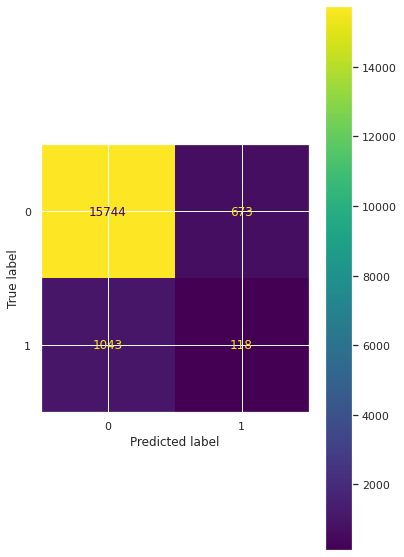

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
y_pred_catboost_train=model.predict(X_train_res)
print(classification_report(y_train_res,y_pred_catboost_train))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     38427
           1       0.95      0.82      0.88     38427

    accuracy                           0.89     76854
   macro avg       0.90      0.89      0.89     76854
weighted avg       0.90      0.89      0.89     76854



In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 95 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   displacement                           58592 non-null  float64
 1   turning_radius                         58592 non-null  float64
 2   gross_weight                           58592 non-null  float64
 3   length                                 58592 non-null  float64
 4   width                                  58592 non-null  float64
 5   height                                 58592 non-null  float64
 6   policy_tenure                          58592 non-null  float64
 7   age_of_car                             58592 non-null  float64
 8   age_of_policyholder                    58592 non-null  float64
 9   population_density                     58592 non-null  float64
 10  policy_id                              58592 non-null  object 
 11  ma

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   policy_tenure          58592 non-null  float64
 1   age_of_policyholder    58592 non-null  float64
 2   age_of_car             58592 non-null  float64
 3   area_cluster_C1        58592 non-null  uint8  
 4   area_cluster_C10       58592 non-null  uint8  
 5   area_cluster_C11       58592 non-null  uint8  
 6   area_cluster_C12       58592 non-null  uint8  
 7   area_cluster_C13       58592 non-null  uint8  
 8   area_cluster_C14       58592 non-null  uint8  
 9   area_cluster_C15       58592 non-null  uint8  
 10  area_cluster_C16       58592 non-null  uint8  
 11  area_cluster_C17       58592 non-null  uint8  
 12  area_cluster_C18       58592 non-null  uint8  
 13  area_cluster_C19       58592 non-null  uint8  
 14  area_cluster_C2        58592 non-null  uint8  
 15  ar

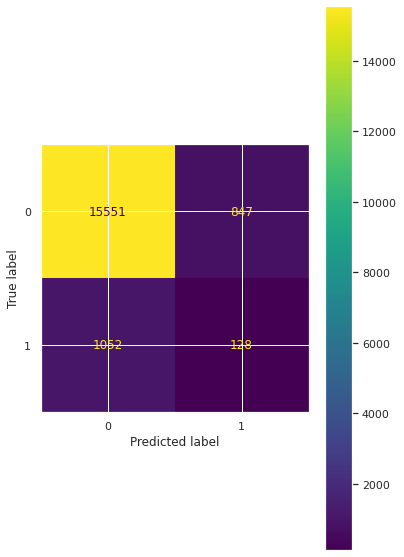

In [ ]:
XX = df2.iloc[:,[6,8,7,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,2,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,91,92,93,94,3,4,12,
                 58,59,60,61,62,63,20]]
yy =df2.iloc[:,35]
print(XX.info())
print(yy)


XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size=0.30,random_state=3)

print("Before OverSampling, counts of label '1': {}".format(sum(yy_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yy_train == 0)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 3)
XX_train_res, yy_train_res = sm.fit_resample(XX_train, yy_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(XX_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yy_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yy_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yy_train_res == 0)))

xgb_cl=xgb.XGBClassifier()

# fit
xgb_cl.fit(XX_train_res,yy_train_res)
# predict
preds=xgb_cl.predict(XX_test)
print("test data_report")
print(classification_report(yy_test,preds))

print("train data report")
preds_train=xgb_cl.predict(XX_train_res)
print(classification_report(yy_train_res,preds_train))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,XX_test,yy_test)

In [ ]:
df_test2.drop(['policy_id'],axis =1 , inplace = True)

In [ ]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 93 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   displacement                           39063 non-null  float64
 1   turning_radius                         39063 non-null  float64
 2   gross_weight                           39063 non-null  float64
 3   length                                 39063 non-null  float64
 4   width                                  39063 non-null  float64
 5   height                                 39063 non-null  float64
 6   policy_tenure                          39063 non-null  float64
 7   age_of_car                             39063 non-null  float64
 8   age_of_policyholder                    39063 non-null  float64
 9   population_density                     39063 non-null  float64
 10  make                                   39063 non-null  int64  
 11  ai

In [ ]:
df_test3 = df_test2.iloc[:,[6,8,7,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,2,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,89,90,91,92,3,4,11,56,57,58,59,60,61,19]]

In [ ]:
df_test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   policy_tenure          39063 non-null  float64
 1   age_of_policyholder    39063 non-null  float64
 2   age_of_car             39063 non-null  float64
 3   area_cluster_C1        39063 non-null  uint8  
 4   area_cluster_C10       39063 non-null  uint8  
 5   area_cluster_C11       39063 non-null  uint8  
 6   area_cluster_C12       39063 non-null  uint8  
 7   area_cluster_C13       39063 non-null  uint8  
 8   area_cluster_C14       39063 non-null  uint8  
 9   area_cluster_C15       39063 non-null  uint8  
 10  area_cluster_C16       39063 non-null  uint8  
 11  area_cluster_C17       39063 non-null  uint8  
 12  area_cluster_C18       39063 non-null  uint8  
 13  area_cluster_C19       39063 non-null  uint8  
 14  area_cluster_C2        39063 non-null  uint8  
 15  ar

In [ ]:
XX = df2.iloc[:,[6,8,7,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,2,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,91,92,93,94,3,4,12,
                 58,59,60,61,62,63,20]]
yy =df2.iloc[:,35]
print(XX.info())
print(yy)


XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size=0.30,random_state=3)

print("Before OverSampling, counts of label '1': {}".format(sum(yy_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yy_train == 0)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 3)
XX_train_res, yy_train_res = sm.fit_resample(XX_train, yy_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(XX_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yy_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yy_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yy_train_res == 0)))

xgb_cl=xgb.XGBClassifier()

# fit
xgb_cl.fit(XX_train_res,yy_train_res)
# predict
preds=xgb_cl.predict(XX_test)

# preds=xgb_cl.predict(XX_test)
print("test data_report")
print(classification_report(yy_test,preds))

print("train data report")
preds_train=xgb_cl.predict(XX_train_res)
print(classification_report(yy_train_res,preds_train))
# predict
preds_final=xgb_cl.predict(df_test3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   policy_tenure          58592 non-null  float64
 1   age_of_policyholder    58592 non-null  float64
 2   age_of_car             58592 non-null  float64
 3   area_cluster_C1        58592 non-null  uint8  
 4   area_cluster_C10       58592 non-null  uint8  
 5   area_cluster_C11       58592 non-null  uint8  
 6   area_cluster_C12       58592 non-null  uint8  
 7   area_cluster_C13       58592 non-null  uint8  
 8   area_cluster_C14       58592 non-null  uint8  
 9   area_cluster_C15       58592 non-null  uint8  
 10  area_cluster_C16       58592 non-null  uint8  
 11  area_cluster_C17       58592 non-null  uint8  
 12  area_cluster_C18       58592 non-null  uint8  
 13  area_cluster_C19       58592 non-null  uint8  
 14  area_cluster_C2        58592 non-null  uint8  
 15  ar

In [ ]:
df4 = df_test1['policy_id']

In [ ]:
df4.head()

0    ID58593
1    ID58594
2    ID58595
3    ID58596
4    ID58597
Name: policy_id, dtype: object

In [ ]:
prediction = pd.DataFrame(preds_final)
final_df = pd.concat((df4,prediction),axis = 1 )
final_df.head()
final_df.rename(columns = {0:'is_claim'}, inplace = True)
final_csv1 = final_df.to_csv('final_csv1.csv', index = False)

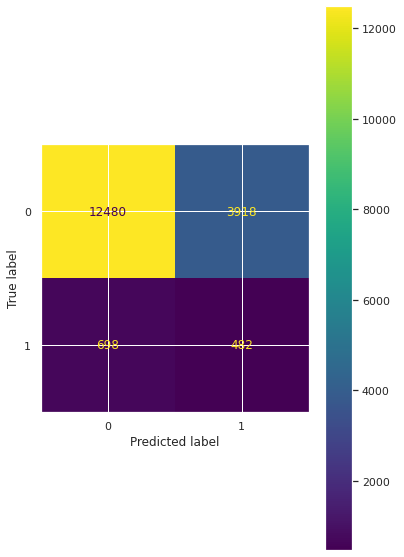

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_cl,XX_test,yy_test)